
## MNIST Classification with FCN

In [2]:
# Import necessary packages
import tensorflow as tf
%matplotlib inline

import matplotlib.pyplot as plt

import torch
import torchvision
import numpy as np

2024-10-08 22:26:50.085582: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-08 22:26:50.258386: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-10-08 22:26:50.258414: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-10-08 22:26:50.298842: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-08 22:26:51.199784: W tensorflow/stream_executor/pla

In [3]:
import numpy as np



### Prepare Data

In [4]:
# Load MNIST Dataset in Numpy

fashion_mnist = tf.keras.datasets.fashion_mnist

(mnist_train_features, mnist_train_targets), (mnist_test_features, mnist_test_targets) = fashion_mnist.load_data() #Images should be (28, 28)

# Print the dimensions of training sample features/targets
print(mnist_train_features.shape) #Reccomend printing the shape of everything else to



4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


[9 0 0]


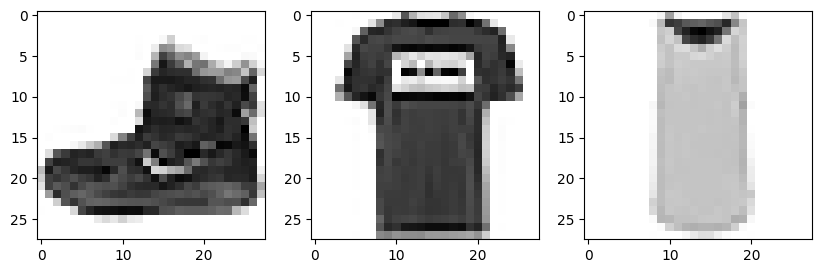

In [7]:
#Visualize data

plt.figure(figsize = (10, 10))

plt.subplot(1,3,1)
plt.imshow(mnist_train_features[0], cmap = 'Greys')

plt.subplot(1,3,2)
plt.imshow(mnist_train_features[1], cmap = 'Greys')

plt.subplot(1,3,3)
plt.imshow(mnist_train_features[2], cmap = 'Greys')

print(mnist_train_targets[0:3])

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


In [23]:
# Reshape features via flattening the images
# The reshaped training/testing features should have a shape that adds to (?, 28*28) #28 comes from pixel size
# np.reshape() function could be useful here

mnist_train_features = np.reshape(mnist_train_features, (____, _____))
mnist_test_features = np.reshape(mnist_test_features, (____, ____))

print(mnist_train_features.shape, mnist_test_features.shape)

(60000, 784) (10000, 784)


In [24]:
# Scale the dataset according to standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

mnist_train_features = scaler.fit_transform(mnist_train_features)
mnist_test_features = scaler.fit_transform(mnist_test_features)

In [25]:
# Split dataset into Train (900 samples), Validation (100 samples), Testing (100 samples)

##DO NOT RUN AGAIN UNTIL YOU HAVE RERUN LOADING DATA

mnist_validation_features = mnist_train_features[:6000]
print(mnist_validation_features.shape)
mnist_validation_targets = mnist_train_targets[6000]
print(mnist_validation_targets.shape)

mnist_train_features = mnist_train_features[6000:]
mnist_train_targets = mnist_train_targets[6000:]
print(mnist_train_features.shape)
print(mnist_train_features.shape)

### Define Model

In [15]:
class mnistClassification(torch.nn.Module):
    
    def __init__(self, input_dim, output_dim, hidden1_dim, hidden2_dim): # Feel free to add hidden_dim as parameters here
        
        super(mnistClassification, self).__init__()
        
        
    def forward(self, x):
        
        
        
        return output

### Define Hyperparameters

In [16]:
# Initialize our neural network model with input and output dimensions
model = mnistClassification()

# Define the learning rate and epoch 
learning_rate = 
epochs = 
batchsize = 

# Define loss function and optimizer
loss_func = 
optimizer = torch.optim.Adam()
# Run this line if you have PyTorch GPU version


model

### Identify Tracked Values

In [33]:
# Placeholders for training loss and validation accuracy during training
# Training loss should be tracked for each iteration (1 iteration -> single forward pass to the network)
# Validation accuracy should be evaluated every 'Epoch' (1 epoch -> full training dataset)
# If using batch gradient, 1 iteration = 1 epoch

train_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))


train_accuracy_list = np.zeros((epochs,))
val_loss_list = np.zeros((epochs,))

### Train Model

In [26]:

mnist_train_features = torch.from_numpy(mnist_train_features).float()
mnist_train_targets = torch.from_numpy(mnist_train_targets).long()

mnist_validation_features = torch.from_numpy(mnist_validation_features).float()
mnist_validation_targets = torch.from_numpy(mnist_validation_targets).long()

mnist_test_features = torch.from_numpy(mnist_test_features).float()
mnist_test_targets = torch.from_numpy(mnist_test_targets).long()

In [36]:
import tqdm

# Convert the training, validation, testing dataset (NumPy arrays) into torch tensors


# Training Loop ---------------------------------------------------------------------------------------

for epoch in tqdm.trange(epochs):
    
    optimizer.zero_grad()
    train_output = model(mnist_train_features)
    loss = loss_func(train_output, mnist_train_targets)
    train_loss_list[epoch] = loss.item()
    correct = (torch.argmax(train_output, dim=1) == mnist_train_targets).type(torch.FloatTensor)
    train_accuracy_list[epoch] = correct.mean()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))
    
    # Compute Validation Accuracy ----------------------------------------------------------------------
    
    with torch.no_grad():
        validation_outputs = model(mnist_validation_features)
        correct = (torch.argmax(validation_outputs, dim=1) == mnist_validation_targets).type(torch.FloatTensor)
        loss = loss_func(validation_outputs, mnist_validation_targets)
        validation_accuracy_list[epoch] = correct.mean()
        val_loss_list[epoch] = loss.item()
    


### Visualize and Evaluate Model

In [37]:
# Import seaborn for prettier plots

import seaborn as sns

In [45]:
# Visualize training loss

plt.figure(figsize = (12, 12))

# Visualize training loss with respect to iterations (1 iteration -> single batch)
plt.subplot(2, 1, 1)
plt.plot(train_loss_list, linewidth = 3, label = "training", color = "blue")
plt.plot(val_loss_list, linewidth = 3, label = "Val", color = "gold")
plt.ylabel("loss")
plt.xlabel("epochs")
sns.despine()

# Visualize validation accuracy with respect to epochs
plt.subplot(2, 1, 2)
plt.plot(train_accuracy_list, linewidth = 3, color = 'blue')
plt.plot(validation_accuracy_list, linewidth = 3, color = 'gold')
plt.ylabel("validation accuracy")
sns.despine()

In [30]:
# Compute the testing accuracy 

with torch.no_grad():
    test_predict = model(mnist_test_features)
    test_correct = (torch.argmax(test_predict, dim=1) == mnist_test_targets).type(torch.FloatTensor)
    print("Testing Accuracy:", test_correct.mean().numpy()*100, "%")

Testing Accuracy: 79.43999767303467 %


In [31]:
# Plot 5 incorrectly classified testing samples and print the model predictions for each of them
# You can use np.reshape() to convert flattened 1D array (768,) -> (28, 28)

incorrect_indices = (torch.argmax(test_predict, dim=1) != mnist_test_targets).nonzero(as_tuple=True)[0]

num_incorrect = len(incorrect_indices)
#plt.figure(figsize = (10, 10))
for i in range(0, 5):
    
    plt.subplot(1,5,i+1)
    image = np.reshape(mnist_test_features[incorrect_indices[i]], (28, 28))
    plt.imshow(image, cmap = 'Greys')
    print("Guess", torch.argmax(test_predict, dim=1)[incorrect_indices[i]], "Expected:", mnist_test_targets[incorrect_indices[i]])
 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b23f6d90-881c-4bd6-80b3-6124b622796c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>